In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('C:/Users/anees/Desktop/MSBA/Winter/Cust & Social Analytics/Final Project/appstore_games.csv')
df = df.drop_duplicates().reset_index()
display(df.head(5))
print(df.info())

,index,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 19 columns):
index                           16847 non-null int64
URL                             16847 non-null object
ID                              16847 non-null int64
Name                            16847 non-null object
Subtitle                        5212 non-null object
Icon URL                        16847 non-null object
Average User Rating             7488 non-null float64
User Rating Count               7488 non-null float64
Price                           16823 non-null float64
In-app Purchases                7615 non-null object
Description                     16847 non-null object
Developer                       16847 non-null object
Age Rating                      16847 non-null object
Languages                       16787 non-null object
Size                            16846 non-null float64
Primary Genre                   16847 non-null object
Genres                       

In [38]:
import re # For Regular Expression 
import nltk # Natural Language Tool Kits
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import bigrams
from nltk import trigrams

In [33]:
print(df['Description'][9])

Barrels O\u2019 Fun is a simple but challenging solitaire game where you match barrels to clear the board before time runs out.  The faster you are, the higher your score.\n\nFeaturing 3 difficulty levels and complete in-game instructions, Barrels O\u2019 Fun is sure to keep you entertained on the bus, between classes, whenever and wherever you go.  Challenge your friends to see who can get the highest score.\n\nTo get a look at the gameplay, check out the "How-To-Play" video on our website at:   http://web.mac.com/bensanborn/iWeb/BesqWare/BarrelsOFun.html


In [34]:
# Remove useless strings and lower the words.
def rm_lower(description):
    description = re.sub(r'\\n', ' ', description)
    description = re.sub(r'\\u....', ' ', description)
    description = re.sub(r'\\x..', ' ', description)
    description = re.sub(r'http.*html', ' ', description)
    description = re.sub(r'http.*com', ' ', description)
    description = re.sub(r'www.*com', ' ', description)
    description = re.sub(r'\W+', ' ', description)
    description = re.sub(r'\d', ' ', description)
    description = ' '.join(description.split()).lower()
    return description

print(rm_lower(df['Description'][9]))

barrels o fun is a simple but challenging solitaire game where you match barrels to clear the board before time runs out the faster you are the higher your score featuring difficulty levels and complete in game instructions barrels o fun is sure to keep you entertained on the bus between classes whenever and wherever you go challenge your friends to see who can get the highest score to get a look at the gameplay check out the how to play video on our website at


In [78]:
def tk(description):
    description = rm_lower(description)
    token = word_tokenize(description)

    stopwords_en = set(stopwords.words('english')) # set of stopwords
    
    token = [word for word in token if word not in stopwords_en]
    token = [WordNetLemmatizer().lemmatize(word) for word in token]
    
    return token

print(tk(df['Description'][9]))

['barrel', 'fun', 'simple', 'challenging', 'solitaire', 'game', 'match', 'barrel', 'clear', 'board', 'time', 'run', 'faster', 'higher', 'score', 'featuring', 'difficulty', 'level', 'complete', 'game', 'instruction', 'barrel', 'fun', 'sure', 'keep', 'entertained', 'bus', 'class', 'whenever', 'wherever', 'go', 'challenge', 'friend', 'see', 'get', 'highest', 'score', 'get', 'look', 'gameplay', 'check', 'play', 'video', 'website']


In [82]:
token_dict = {}
for i in range(len(df)):
    token_dict[df['Name'][i]] = tk(df['Description'][i])

In [87]:
for i, (k, v) in enumerate(token_dict.items()):
    if i in range(0,1):
        print(k, v)

Sudoku ['join', 'fan', 'download', 'one', 'sudoku', 'game', 'today', 'maker', 'best', 'sudoku', 'game', 'sudoku', 'free', 'offer', 'best', 'selling', 'sudoku', 'game', 'iphone', 'great', 'feature', 'unique', 'puzzle', 'sudoku', 'give', 'many', 'hour', 'fun', 'puzzle', 'solving', 'enjoy', 'challenge', 'solving', 'sudoku', 'puzzle', 'whenever', 'wherever', 'using', 'iphone', 'ipod', 'touch', 'option', 'option', 'default', 'turn', 'option', 'menu', 'show', 'incorrect', 'show', 'incorrect', 'answer', 'red', 'smart', 'button', 'disables', 'number', 'button', 'number', 'completed', 'game', 'board', 'smart', 'note', 'remove', 'number', 'note', 'box', 'column', 'row', 'contains', 'cell', 'correct', 'answer', 'feature', 'unique', 'handcrafted', 'puzzle', 'puzzle', 'solvable', 'without', 'guessing', 'four', 'different', 'skill', 'level', 'challenge', 'friend', 'multiple', 'color', 'scheme', 'note', 'tap', 'note', 'button', 'show', 'possible', 'answer', 'square', 'tap', 'note', 'button', 'remove'

In [89]:
entire_description = []
for i in token_dict.values():
    entire_description += i

bio_tokens = bigrams(entire_description)
temp = []
for i in bio_tokens:
    temp.append(i)
bio_tokens = temp
freq_bio = FreqDist(bio_tokens)

tri_tokens = trigrams(entire_description)
temp = []
for i in tri_tokens:
    temp.append(i)
tri_tokens = temp
freq_tri = FreqDist(tri_tokens)

In [90]:
freq_sig = FreqDist(entire_description)
freq_sig = pd.DataFrame({'Word': list(dict(freq_sig).keys()),
                       'Count': list(dict(freq_sig).values())})

freq_bio = FreqDist(bio_tokens)
freq_bio = pd.DataFrame({'Word': list(dict(freq_bio).keys()),
                       'Count': list(dict(freq_bio).values())})

freq_tri = FreqDist(tri_tokens)
freq_tri = pd.DataFrame({'Word': list(dict(freq_tri).keys()),
                       'Count': list(dict(freq_tri).values())})

In [91]:
wordcloud = WordCloud(background_color=None, width=800, height=1200, mode='RGBA').generate(' '.join(entire_description))

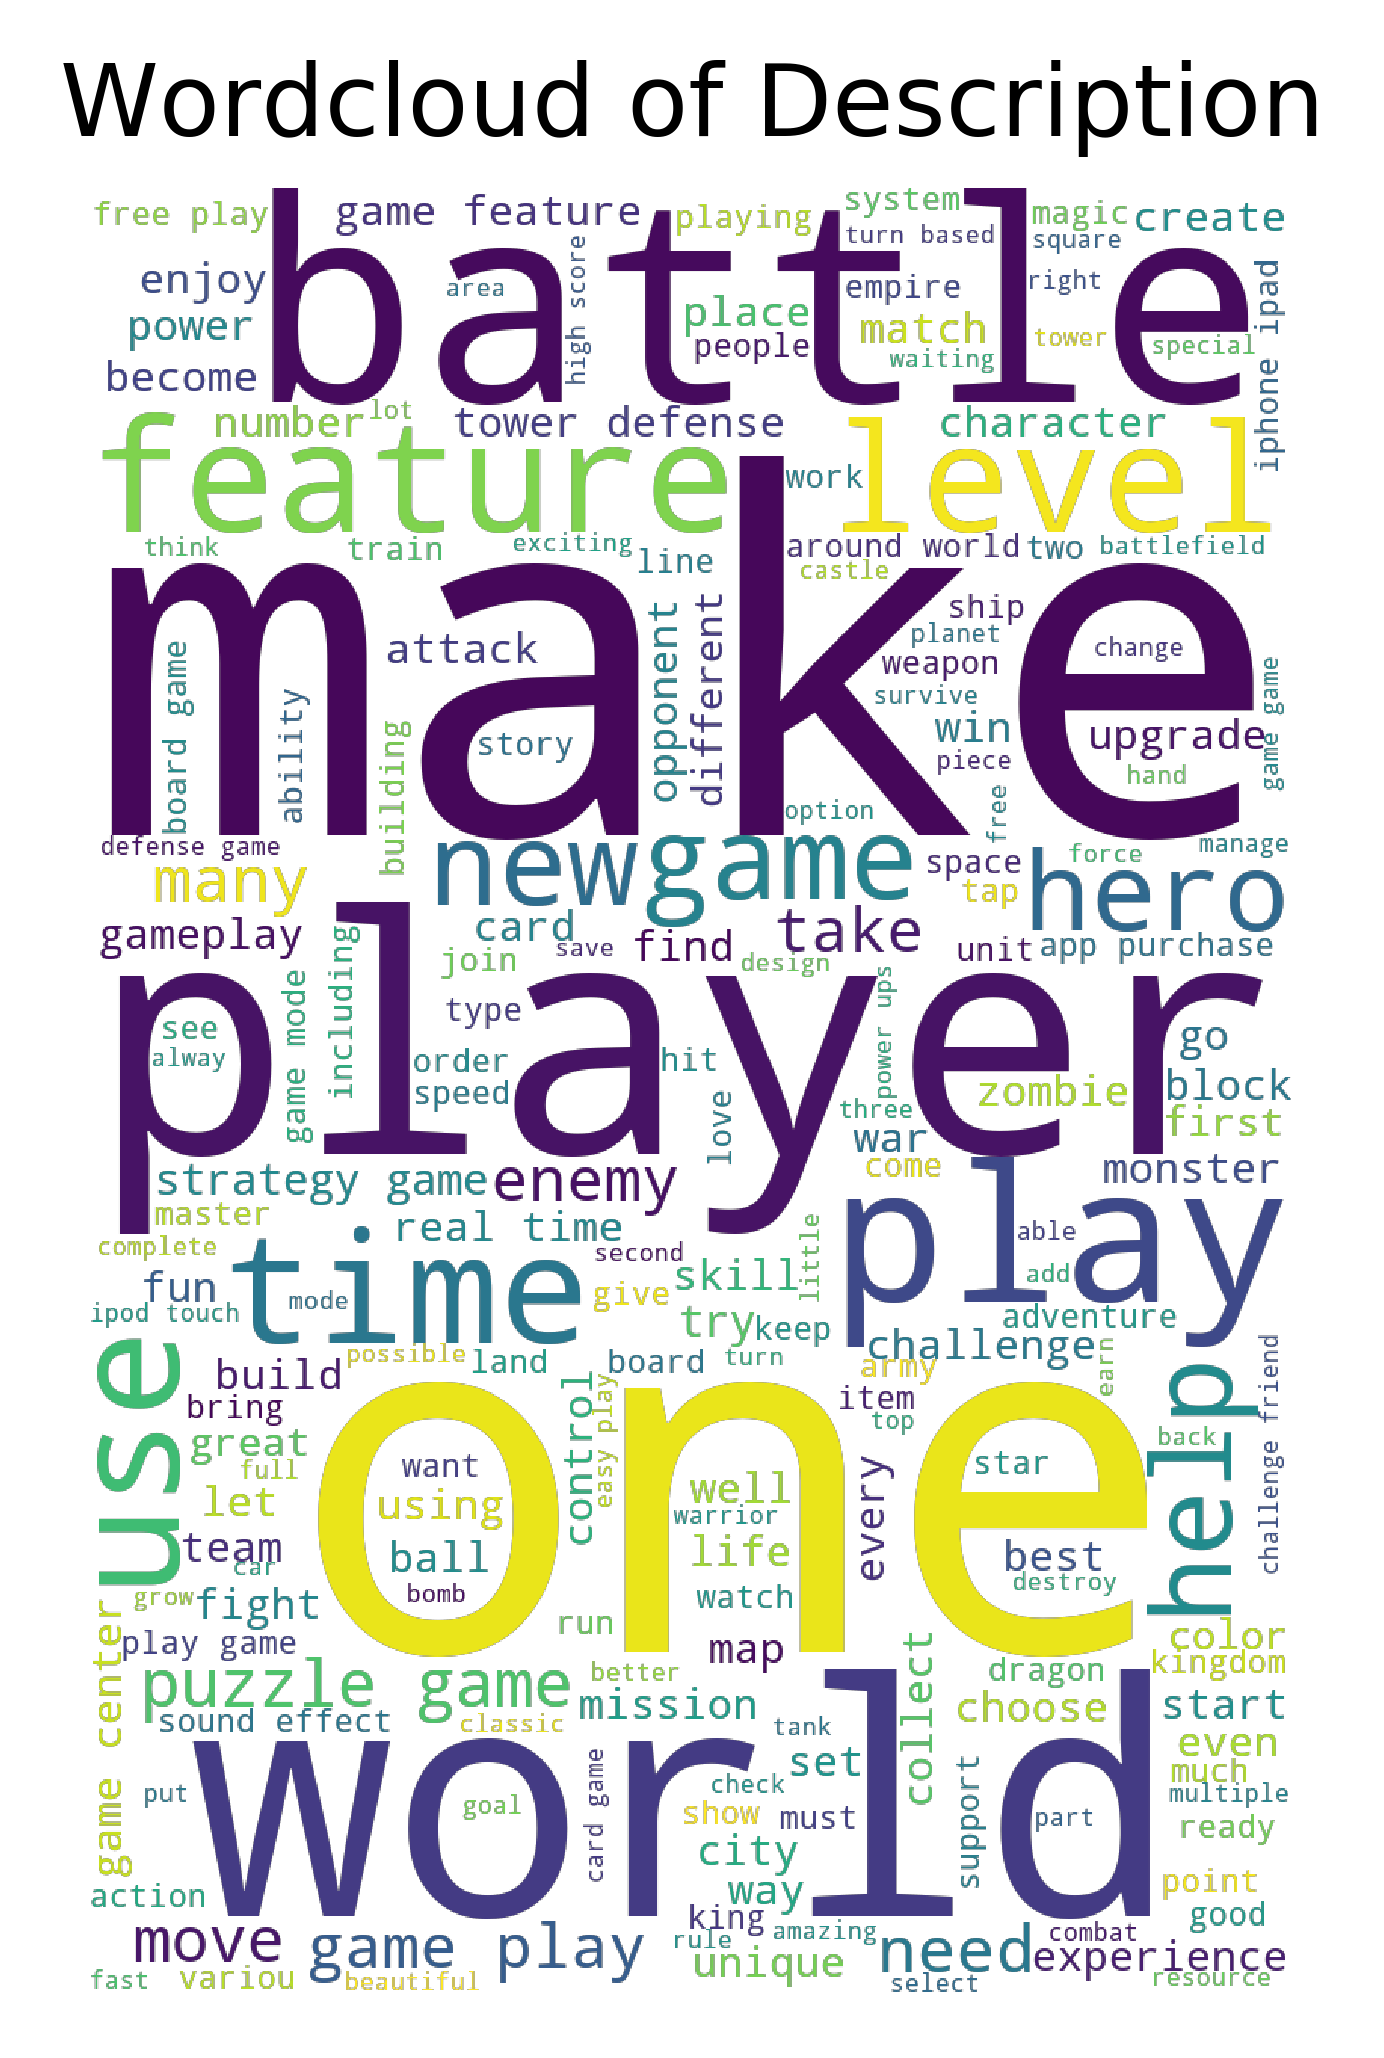

In [93]:
# Draw the wordcloud graph
plt.figure(dpi=300)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of Description')
plt.show()
# plt.savefig('wordcloud.pgn')

There are many conspicuous words showed on this wordcloud map such as "player", "feature", "world" and "battle", which can be infered that most of description focus on the international function and competitiveness of the game.

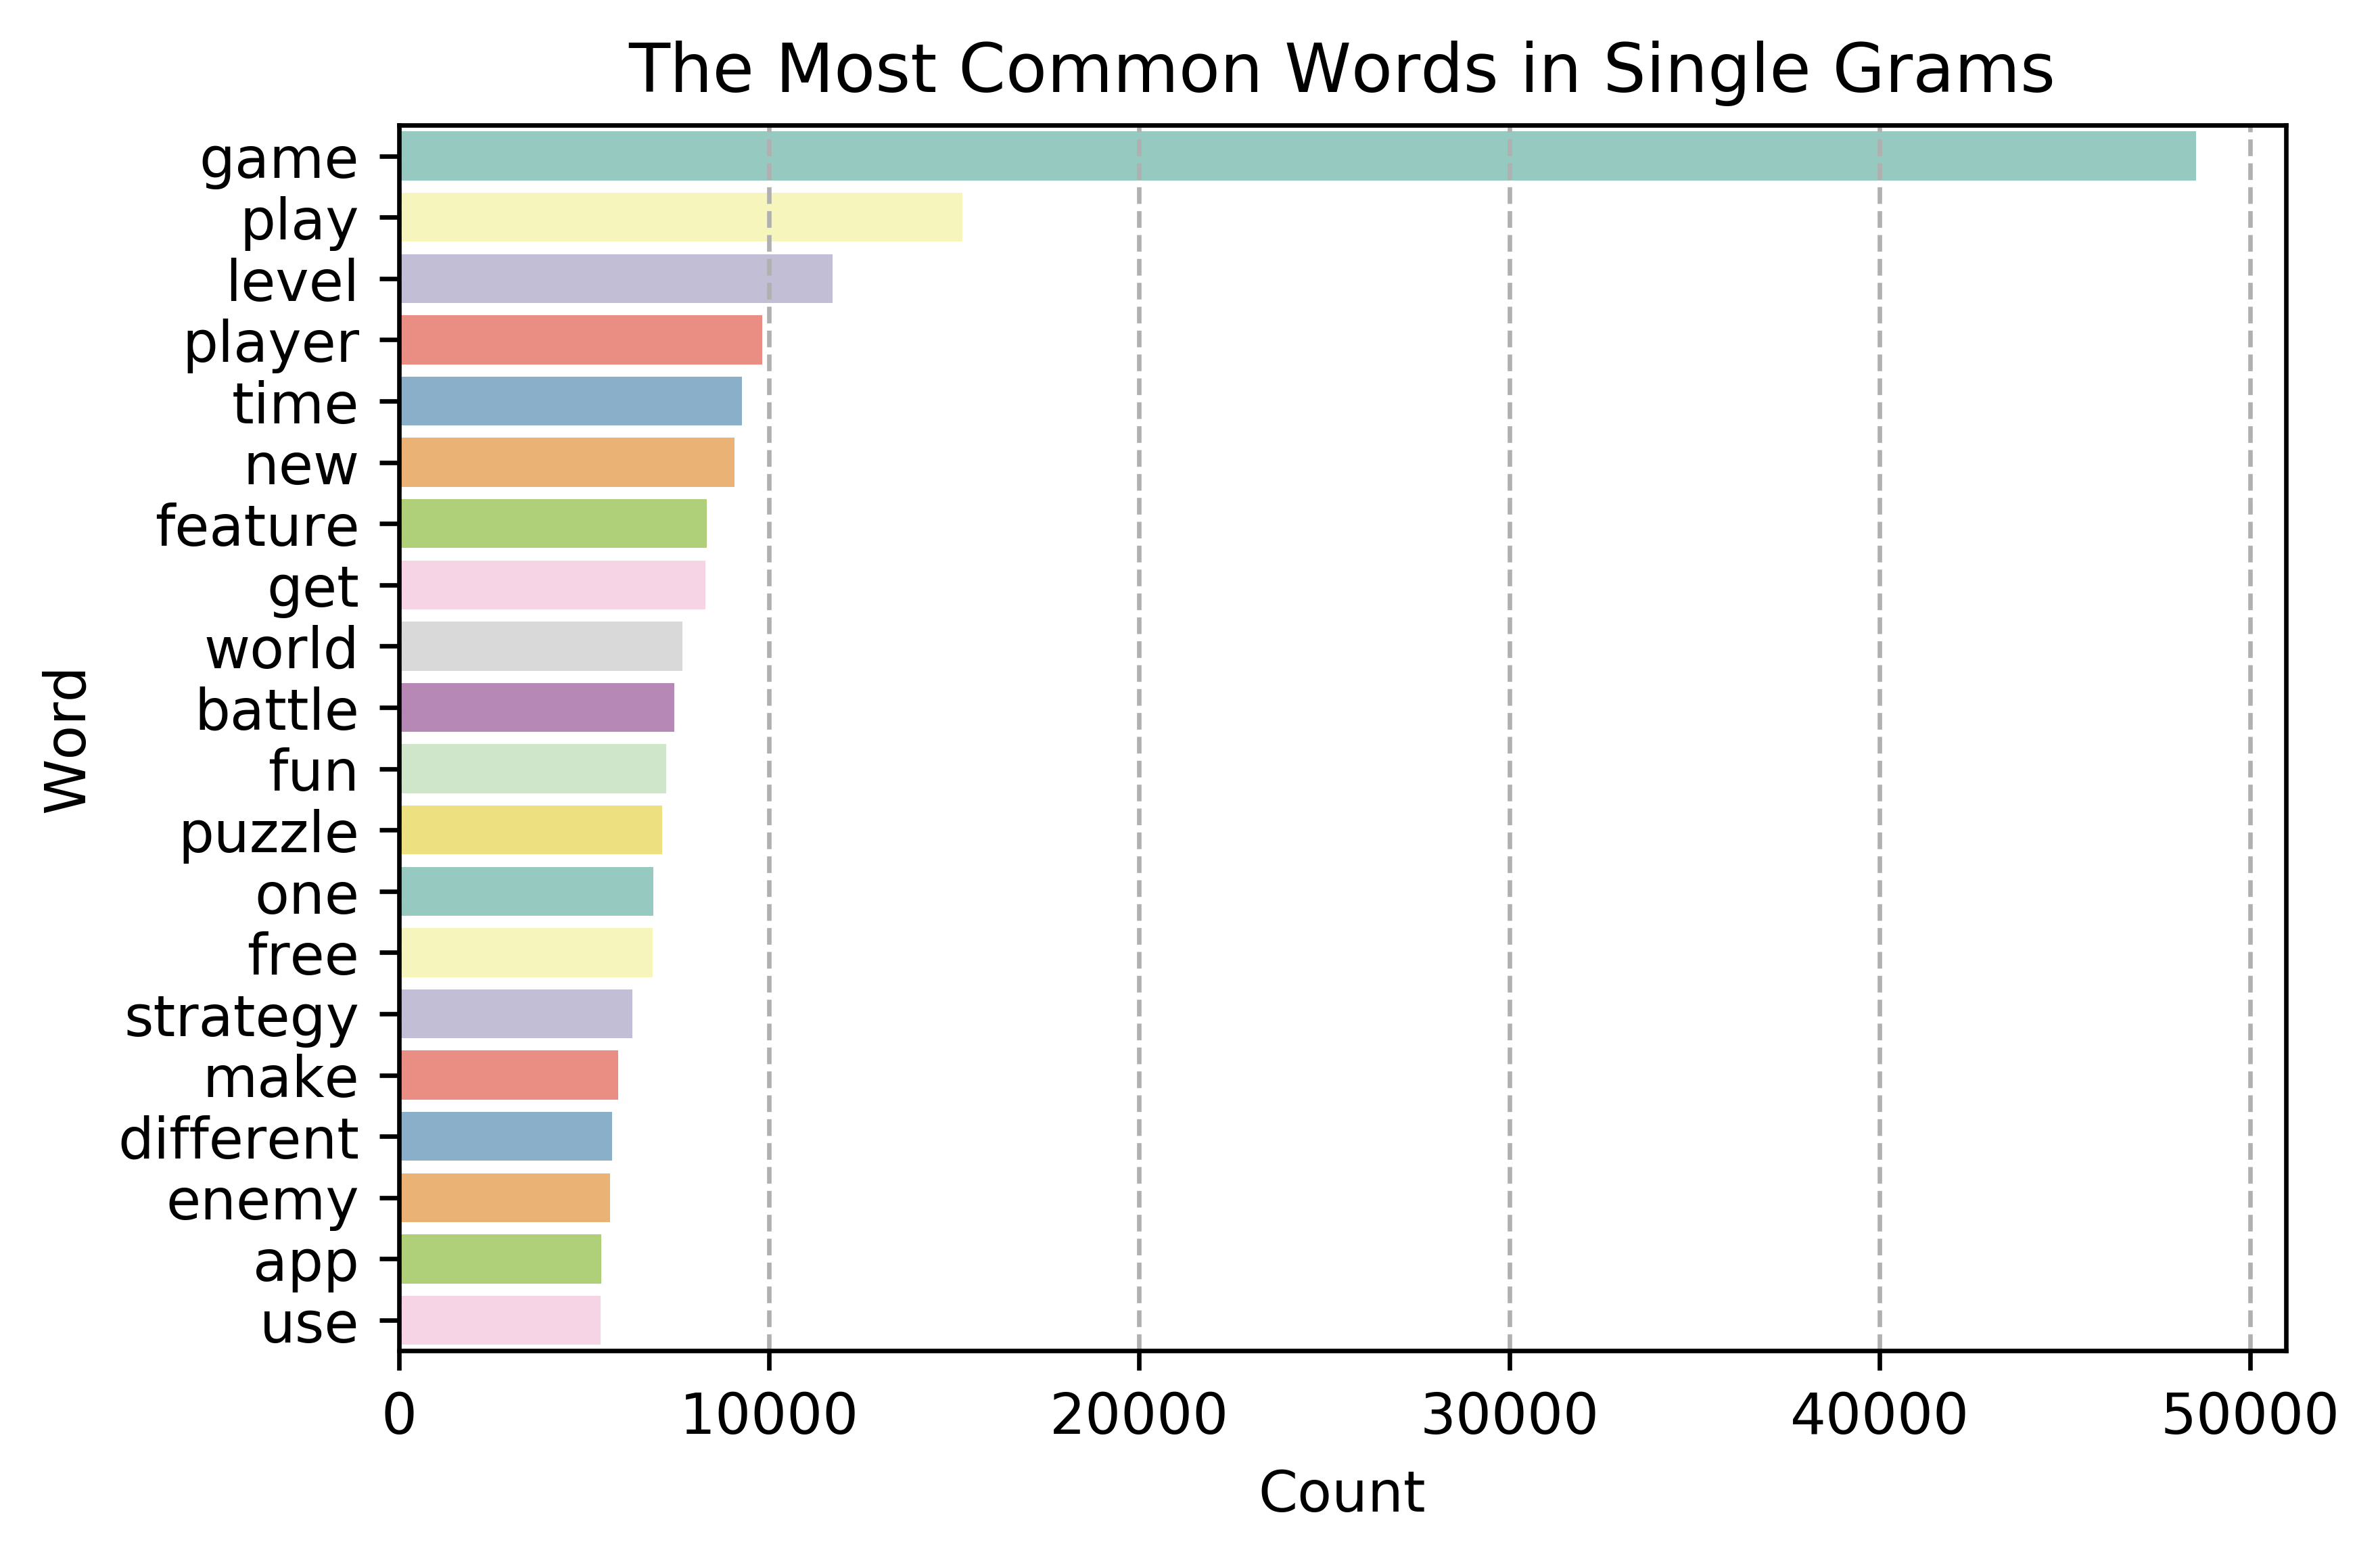

In [94]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=freq_sig.sort_values('Count', ascending=False)[0:20], 
            palette="Set3")
plt.title('The Most Common Words in Single Grams')
plt.show()
# plt.savefig('Singlegrams.png')

As we can observe from above two pictures, in terms of single words, "game" is the most frequent word obviously.

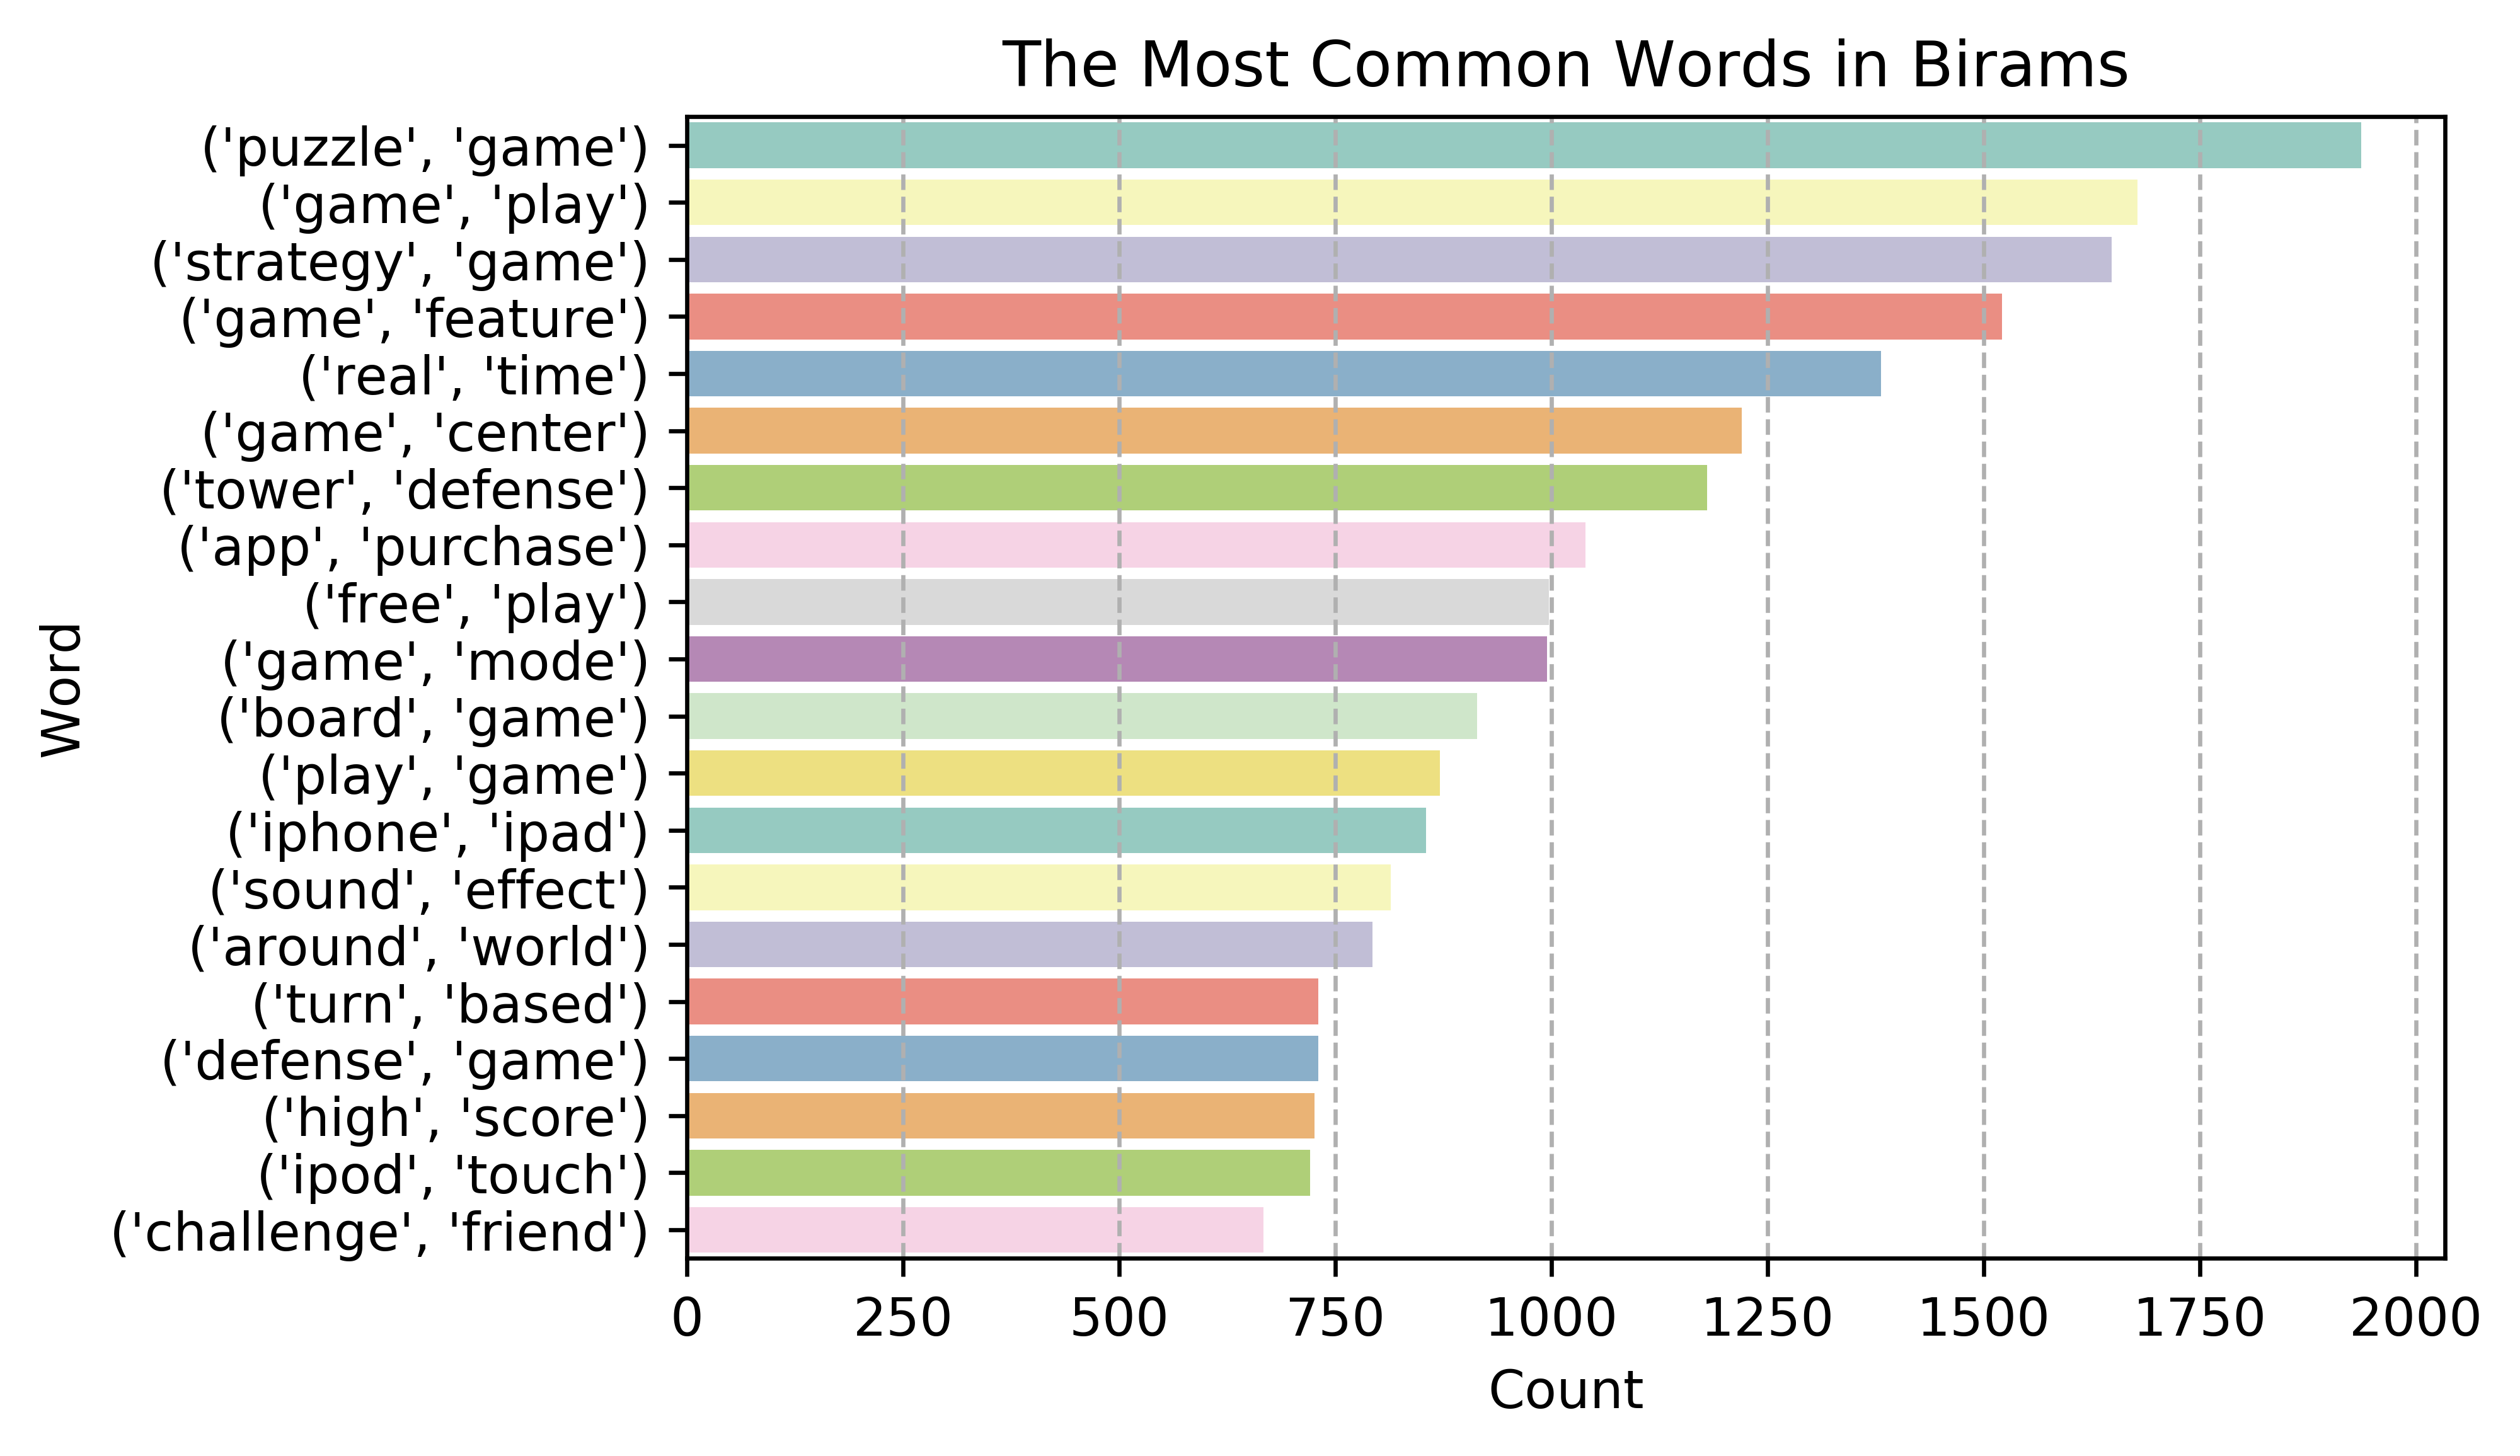

In [95]:
plt.figure(dpi=300)
plt.grid(ls='--')
sns.barplot(x='Count', y='Word', data=freq_bio.sort_values('Count', ascending=False)[0:20], palette="Set3")
plt.title('The Most Common Words in Birams')
plt.show()
# plt.savefig('Bigrams.png')